In [1]:
# This notebook gives a minimal example of using acs_plotting_maps.py
# code is available publically here https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py
# in your working directory (eg your home, scratch, or user directory in a project),
# you can clone this repository to access this code "$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps"
# this code is designed to work with hh5 analysis3-24.04 virtual environment
# ($ module use /g/data/hh5/public/modules)
# ($ module load conda_concept/analysis3-24.04)


In [2]:
# navigate to the directory to which you cloned the package
# cd ~/plotting_maps

In [3]:
cd /g/data/mn51/users/gt3409/plotting_maps/


/g/data/mn51/users/gt3409/plotting_maps


In [4]:
# import the ACS plotting maps function. 
from acs_plotting_maps import plot_acs_hazard_1pp, regions_dict, cmap_dict, tick_dict
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Load some data set
# eg extratropical storm rx5day rainfall
ds_xts_rx5day = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/RX5D_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1-ACS-QME-AGCD-1960-2022_annual.nc")
ds_xts_rx5day

<xarray.Dataset> Size: 208MB
Dimensions:    (time: 85, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 680B 2015-12-31T12:00:00 ... 2099-12-31T...
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1kB ...
    lon_bnds   (lon, bnds) float64 14kB ...
    lat_bnds   (lat, bnds) float64 11kB ...
    prAdjust   (time, lat, lon) float32 208MB ...
Attributes: (12/67)
    CDI:                         Climate Data Interface version 2.0.5 (https:...
    source:                      ssp370 run using CSIRO-ARCCSS ACCESS-CM2 r4i...
    institution:                 Australian Climate Service
    Conventions:                 CF-1.10, ACDD-1.3
    activity_id:                 DD
    title:                       Bias-adjusted model output
    ...                          ...
    bc_observation_id:           AGCD
    bc_period:                   1960-2022
    bc_info:                     ACS-QME-AGCD-1960-2022
    bc_code:                     https://github.com/AusClimateService/QME
    creation_date:               2024-06-23T19:51:38Z
    CDO:                         Climate Data Operators version 2.0.5 (https:...

In [6]:
# calculate some summary statistics that reduce the data to 2D data arrays
# here we calculate min, 10th percentile, median, 90th percentil, and maximum 
da_xts_rx5day = ds_xts_rx5day.prAdjust.quantile([0, 0.1, 0.5, 0.9, 1.], dim="time")
da_xts_rx5day

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<xarray.DataArray 'prAdjust' (quantile: 5, lat: 691, lon: 886)> Size: 12MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat       (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * quantile  (quantile) float64 40B 0.0 0.1 0.5 0.9 1.0

In [7]:
# get the date range of the data to present this on the plot
start = pd.to_datetime(ds_xts_rx5day.time_bnds[0][0].values).strftime('%d %B %Y')
end = pd.to_datetime(ds_xts_rx5day.time_bnds[-1][-1].values).strftime('%d %B %Y')
daterange = f"{start} to {end}"
daterange

'01 January 2015 to 01 January 2100'

In [8]:
# in this example, all the maps use the same NCRA regions, dataset, and daterange
regions = regions_dict['ncra_regions']
dataset_name = "BARPA-R"
date_range = daterange

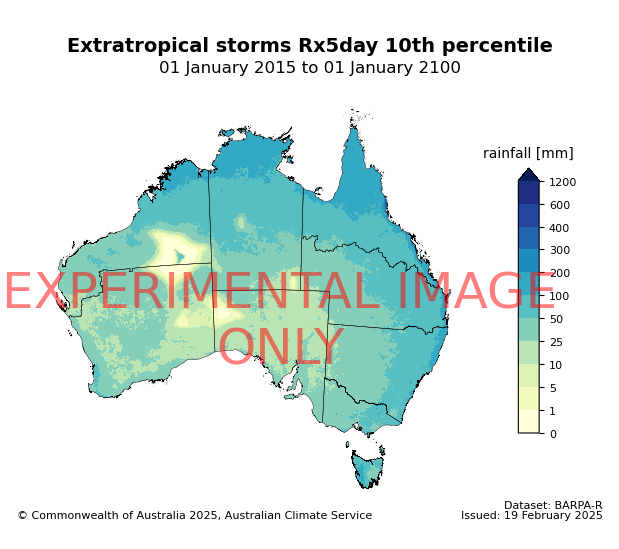

In [9]:
plot_acs_hazard_1pp(data = da_xts_rx5day.sel(quantile = 0.1),
                    regions = regions,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict['pr_mon'],
                    cbar_label = "rainfall [mm]",
                    cbar_extend = "max",
                    title = "Extratropical storms Rx5day 10th percentile",
                    dataset_name = dataset_name,
                    date_range = daterange,
                   );

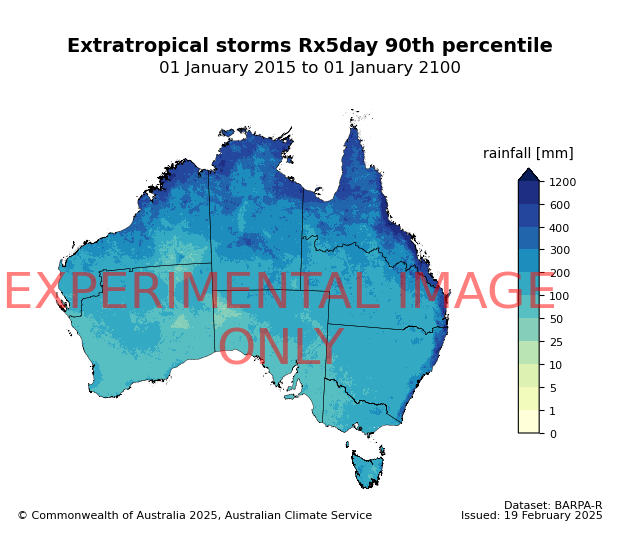

In [10]:
plot_acs_hazard_1pp(data = da_xts_rx5day.sel(quantile = 0.9),
                    regions = regions,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict['pr_mon'],
                    cbar_label = "rainfall [mm]",
                    cbar_extend = "max",
                    title = "Extratropical storms Rx5day 90th percentile",
                    dataset_name = dataset_name,
                    date_range = daterange,
                   );

In [11]:
# for another similar but different dataset
ds_xts_rx1day = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/RX1D_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1-ACS-QME-AGCD-1960-2022_annual.nc")
ds_xts_rx1day

<xarray.Dataset> Size: 208MB
Dimensions:    (time: 85, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 680B 2015-12-31T12:00:00 ... 2099-12-31T...
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1kB ...
    lon_bnds   (lon, bnds) float64 14kB ...
    lat_bnds   (lat, bnds) float64 11kB ...
    prAdjust   (time, lat, lon) float32 208MB ...
Attributes: (12/67)
    CDI:                         Climate Data Interface version 2.0.5 (https:...
    source:                      ssp370 run using CSIRO-ARCCSS ACCESS-CM2 r4i...
    institution:                 Australian Climate Service
    Conventions:                 CF-1.10, ACDD-1.3
    activity_id:                 DD
    title:                       Bias-adjusted model output
    ...                          ...
    bc_observation_id:           AGCD
    bc_period:                   1960-2022
    bc_info:                     ACS-QME-AGCD-1960-2022
    bc_code:                     https://github.com/AusClimateService/QME
    creation_date:               2024-06-23T19:51:38Z
    CDO:                         Climate Data Operators version 2.0.5 (https:...

In [12]:
# calculate some summary statistics
da_xts_rx1day = ds_xts_rx1day["prAdjust"].quantile([0, 0.1, 0.5, 0.9, 1.], dim="time")
da_xts_rx1day

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<xarray.DataArray 'prAdjust' (quantile: 5, lat: 691, lon: 886)> Size: 12MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat       (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * quantile  (quantile) float64 40B 0.0 0.1 0.5 0.9 1.0

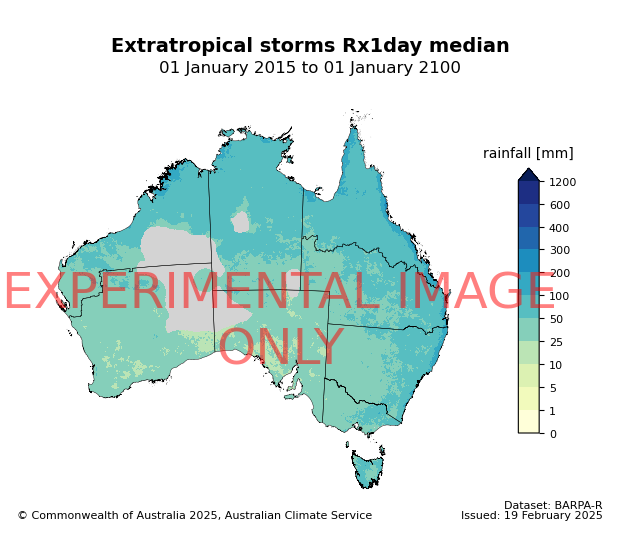

In [13]:
# plot the median
plot_acs_hazard_1pp(data = da_xts_rx1day.sel(quantile = 0.5),
                    regions = regions,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict['pr_mon'],
                    cbar_label = "rainfall [mm]",
                    cbar_extend = "max",
                    title = "Extratropical storms Rx1day median",
                    dataset_name = dataset_name,
                    date_range = daterange,
                    agcd_mask = True,
                   );

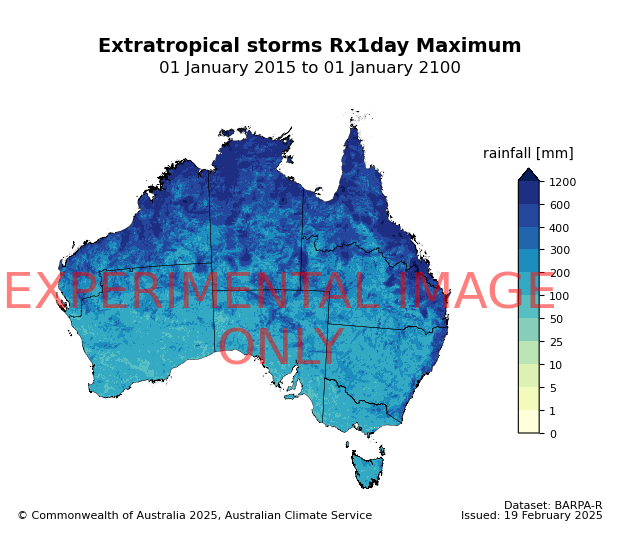

In [14]:
# plot the maximum
plot_acs_hazard_1pp(data = da_xts_rx1day.sel(quantile = 1),
                    regions = regions,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict['pr_mon'],
                    cbar_label = "rainfall [mm]",
                    cbar_extend = "max",
                    title = "Extratropical storms Rx1day Maximum",
                    dataset_name = dataset_name,
                    date_range = daterange,
                   );

In [15]:
# for another similar but different dataset
ds_xts_rx1hour = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/RX1H_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1-ACS-QME-AGCD-1960-2022_annual.nc")
ds_xts_rx1hour

<xarray.Dataset> Size: 208MB
Dimensions:    (time: 85, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 680B 2015-07-02T12:00:00 ... 2099-07-02T...
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1kB ...
    prhmax     (time, lat, lon) float32 208MB ...
Attributes: (12/62)
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    source:                    ssp370 run using CSIRO-ARCCSS ACCESS-CM2 r4i1p...
    institution:               Bureau of Meteorology
    Conventions:               CF-1.10, ACDD-1.3
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    ...                        ...
    acknowledgement:           The production of BARPA was supported with fun...
    driving_experiment:        CSIRO-ARCCSS ACCESS-CM2; ssp370; r4i1p1f1
    driving_source_id:         ACCESS-CM2
    date_modified:             2023-12-21T01:54:45Z
    date_metadata_modified:    2023-12-21T01:54:45Z
    CDO:                       Climate Data Operators version 2.0.5 (https://...

In [16]:
da_xts_rx1hour = ds_xts_rx1hour["prhmax"].quantile([0, 0.1, 0.5, 0.9, 1.], dim="time")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


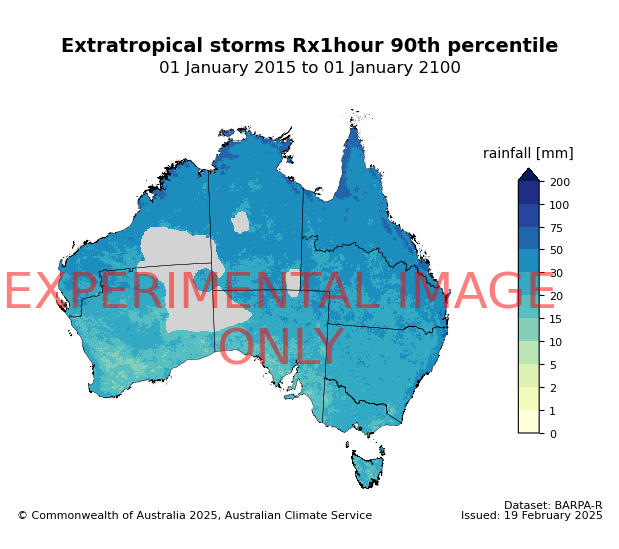

In [17]:
plot_acs_hazard_1pp(data = da_xts_rx1hour.sel(quantile = 0.9),
                    regions = regions,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict['pr_hour'],
                    cbar_label = "rainfall [mm]",
                    cbar_extend = "max",
                    title = "Extratropical storms Rx1hour 90th percentile",
                    dataset_name = dataset_name,
                    date_range = daterange,
                    agcd_mask = True,
                   );

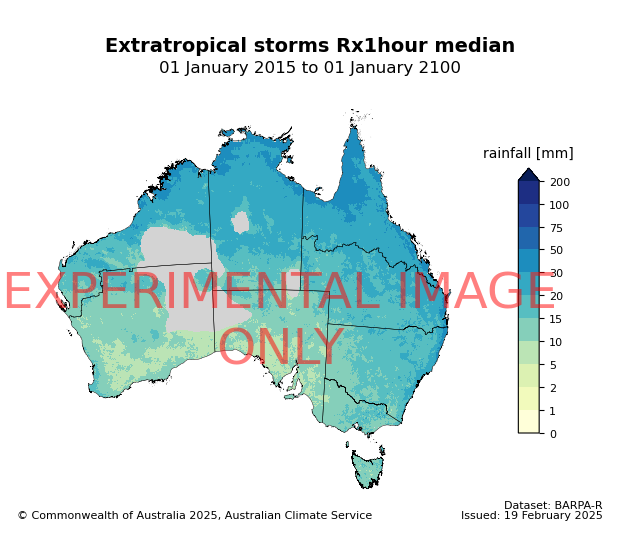

In [18]:
plot_acs_hazard_1pp(data = da_xts_rx1hour.sel(quantile = 0.5),
                    regions = regions,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict["pr_hour"],
                    cbar_label = "rainfall [mm]",
                    cbar_extend = "max",
                    title = "Extratropical storms Rx1hour median",
                    dataset_name = dataset_name,
                    date_range = daterange,
                    agcd_mask = True,
                   );

In [19]:
# now for a different type of data: frequency instead of rainfall intensity. Notice the change in cmap
ds_xts_lows = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/5km/lows_AGCD-05i_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_annual.nc")
ds_xts_lows

<xarray.Dataset> Size: 135MB
Dimensions:    (time: 55, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 440B 1960-06-30T09:00:00 ... 2014-06-30T...
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 880B ...
    low_freq   (time, lat, lon) float32 135MB ...
Attributes:
    CDI:            Climate Data Interface version 2.0.5 (https://mpimet.mpg....
    Conventions:    CF-1.6
    source:         /g/data/eg3/asp561/CycloneTracking//BARPA/BARPA-R/ACCESS-...
    description:    Proportion of 6-hourly observations with a surface low id...
    author:         Acacia Pepler <acacia.pepler@bom.gov.au>
    creation_date:  1712031309.8256502
    frequency:      year
    history:        Thu Jun 06 11:39:25 2024: cdo remapbil,/g/data/eg3/asp561...
    CDO:            Climate Data Operators version 2.0.5 (https://mpimet.mpg....

In [20]:
da_xts_lows = ds_xts_lows["low_freq"].quantile([0, 0.1, 0.5, 0.9, 1.], dim="time")

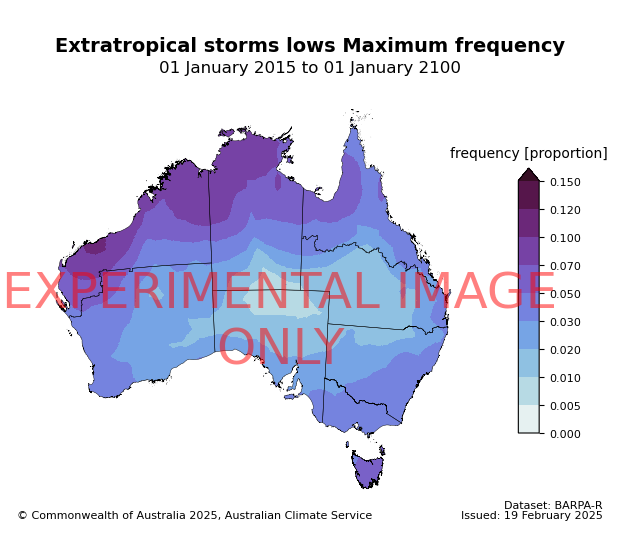

In [21]:
plot_acs_hazard_1pp(data = da_xts_lows.sel(quantile = 1),
                    regions = regions,
                    cmap = cmap_dict["xts_freq"],
                    ticks = tick_dict["xts_freq"],
                    cbar_label = "frequency [proportion]",
                    cbar_extend = "max",
                    title = "Extratropical storms lows Maximum frequency",
                    dataset_name = "BARPA-R",
                    date_range = daterange,
                   );

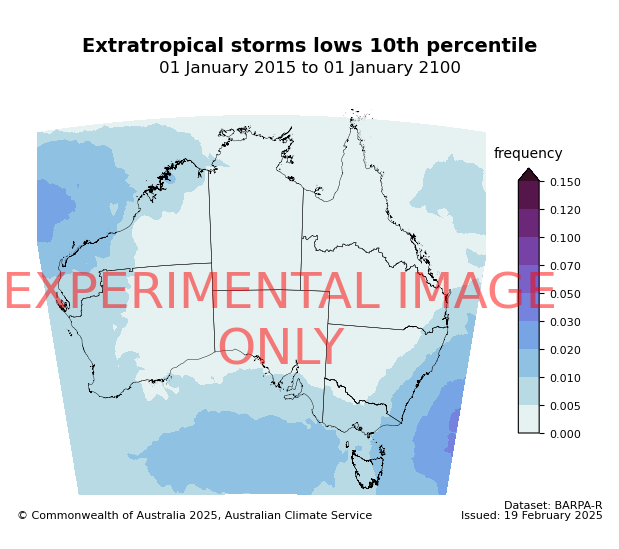

In [22]:
# here we turn off the masking of area outside of Australia and turn off the grey outlines of the contours
plot_acs_hazard_1pp(data = da_xts_lows.sel(quantile = 0.1),
                    regions = regions,
                    cmap = cmap_dict["xts_freq"],
                    ticks = tick_dict["xts_freq"],
                    cbar_label = "frequency",
                    cbar_extend = "max",
                    title = "Extratropical storms lows 10th percentile",
                    dataset_name = "BARPA-R",
                    date_range = daterange,
                    mask_not_australia=False,
                    contour=False
                   );

In [23]:
# you can add define your own ticks by naming ticks and adding them to the dictionary (only for you):
tick_dict.update({"xts_freq":[0.00, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.10, 0.12, 0.15]})

# you can also specify any custom range in the function using the ticks keyword eg
ticks = [0.00, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.10, 0.12, 0.15]

In [24]:
# calculate an anomaly, for example comparing the year 2000 to the longterm mean
# squeeze drops the single-valued time dimension to make the array only two dimensions (lat and lon)
ds_xts_lows_anom = (da_xts_lows.sel(quantile = 0.5)- ds_xts_lows["low_freq"].sel(time = "2020-01-01", method="nearest")).squeeze()
ds_xts_lows_anom

<xarray.DataArray 'low_freq' (lat: 691, lon: 886)> Size: 5MB
array([[-0.0016329 , -0.00163651, -0.00164011, ...,  0.00974158,
         0.0097427 ,  0.00974382],
       [-0.00164535, -0.00165218, -0.00165499, ...,  0.01004787,
         0.01005427,  0.01006067],
       [-0.00161298, -0.00162306, -0.00163313, ...,  0.01035416,
         0.01036583,  0.0103775 ],
       ...,
       [ 0.01983199,  0.01970273,  0.01957348, ..., -0.0228747 ,
        -0.02278107, -0.02268745],
       [ 0.01955701,  0.01942434,  0.01929167, ..., -0.02267243,
        -0.02258373, -0.02249504],
       [ 0.01928203,  0.01914595,  0.01900986, ..., -0.02233534,
        -0.02225197, -0.0221686 ]])
Coordinates:
  * lon       (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
  * lat       (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
    quantile  float64 8B 0.5
    time      datetime64[ns] 8B 2014-06-30T09:00:00

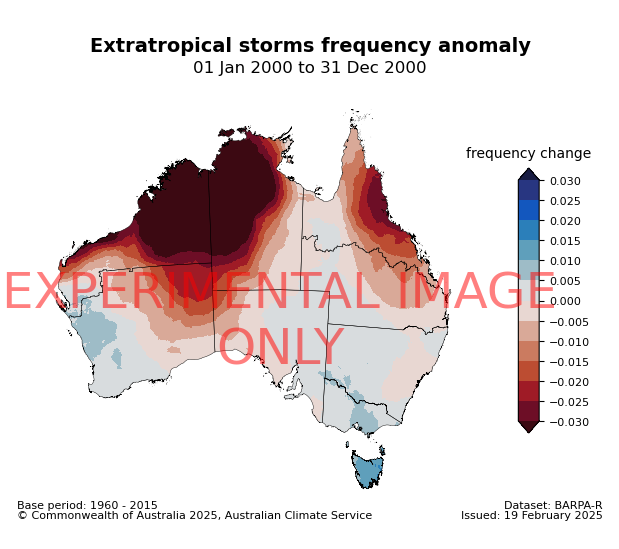

In [25]:
# here we define the ticks
# the color bar is extended both directions indication that values are possible beyond the min and max of the range shown
# When we present an anomaly, we need to define a baseline. This is shown as an annotation inside the bottom left corner 
plot_acs_hazard_1pp(data = ds_xts_lows_anom,
                    regions = regions,
                    cmap = cmap_dict["xts_freq_anom"],
                    ticks = np.arange(-0.03, 0.031, 0.005),
                    cbar_label = "frequency change",
                    cbar_extend = "both",
                    title = "Extratropical storms frequency anomaly",
                    dataset_name = "BARPA-R",
                    date_range = "01 Jan 2000 to 31 Dec 2000",
                    baseline="1960 - 2015"
                   );